# Importing  the required libraries

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read csv file (dataset -> DIAMONDS)

In [368]:
#TYPE OF MACHINE LEARNING SYSTEM ->  SUPERVISED -> BATCH LEARNING ->  MODEL BASSED
data = pd.read_csv('diamonds.csv')

In [369]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [370]:
#we have here 2 columus index so we wanna drop the first one
data.drop(data.columns[0],axis=1,inplace=True)

# Data Discovery

In [371]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [372]:
data.info() #to see the null or non value and type for data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [373]:
data.describe() #determine the statics for columns

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data visualization

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

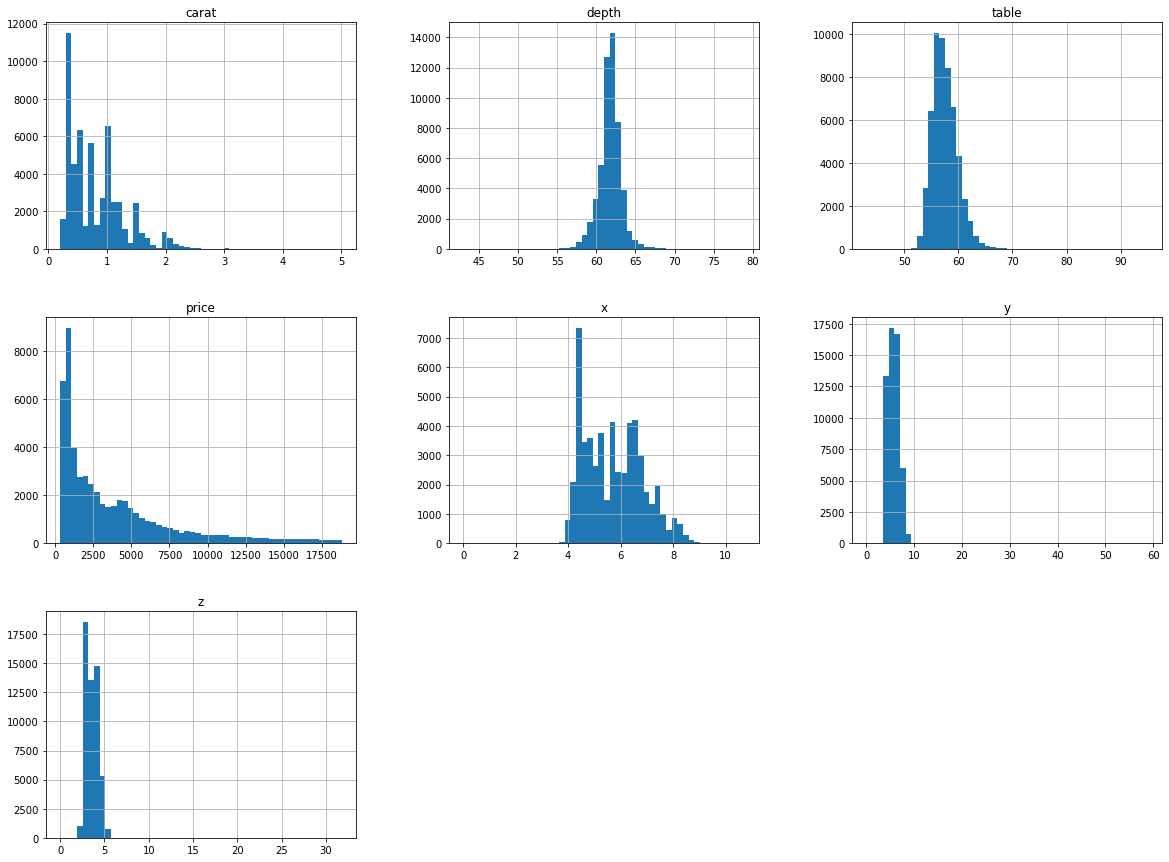

In [375]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [376]:
#Pandas dataframe.corr() is used to find the pairwise correlation
#of all columns in the dataframe. Any na values are automatically excluded.
#For any non-numeric data type columns in the dataframe it is ignored.
data.corr()["price"]

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

In [377]:
data.drop(["depth"],inplace=True,axis=1)

<AxesSubplot:>

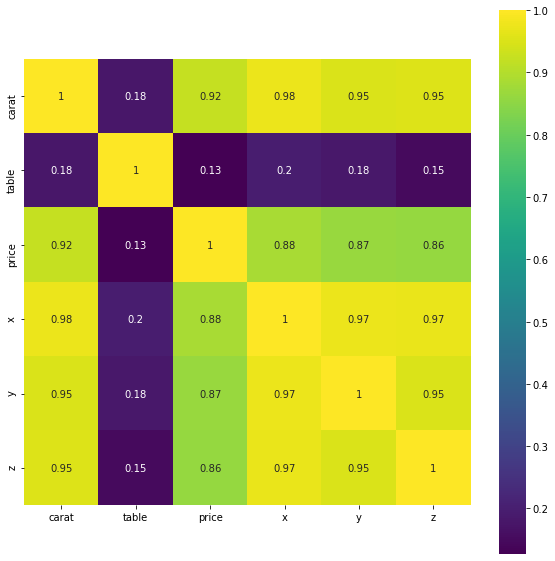

In [378]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='viridis',square=True)

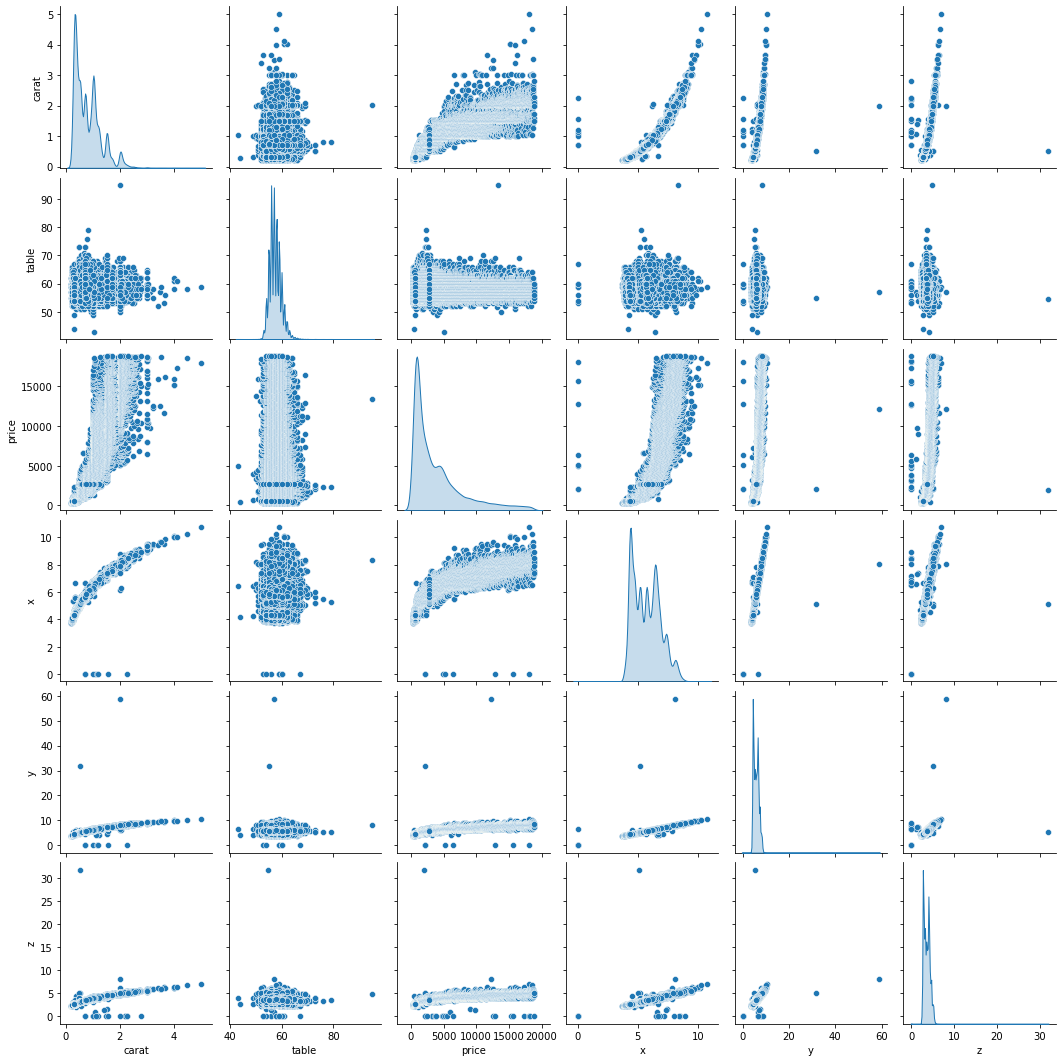

In [379]:

sns.pairplot(data , diag_kind = 'kde')

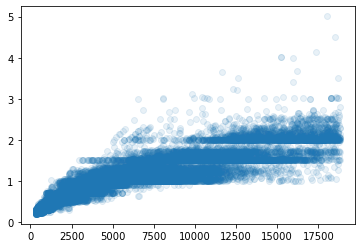

In [380]:
#trying to find a relationship between two columns
x=data["price"] 
y=data['carat']
plt.scatter(x,y,alpha=0.1)

No handles with labels found to put in legend.


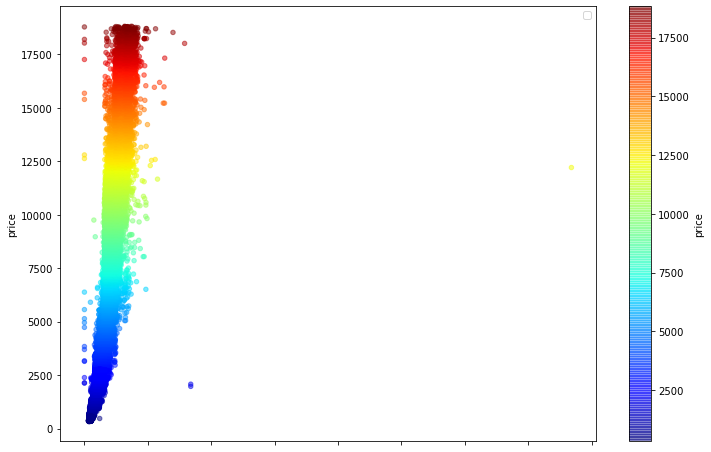

In [381]:
data['volume']=data['x']*data['y']*data['z']
data.plot(kind="scatter", x="volume", y="price", alpha=0.5,
 figsize=(12,8),c='price',
 cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.xlabel('x')
plt.legend()

#

In [382]:
corr_matrix=data.corr()
corr_matrix["price"].sort_values(ascending=False)

price     1.000000
carat     0.921591
volume    0.902385
x         0.884435
y         0.865421
z         0.861249
table     0.127134
Name: price, dtype: float64

<AxesSubplot:xlabel='carat', ylabel='volume'>

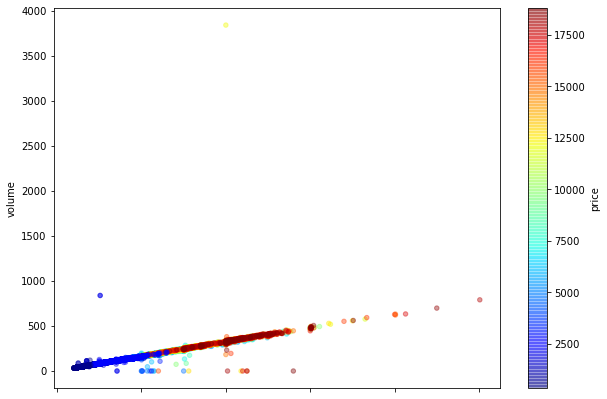

In [383]:
data.plot(x='carat',y='volume',c="price",kind='scatter',
          colorbar=True,alpha=.4,cmap=plt.get_cmap('jet')
          ,figsize=(10,7))

<AxesSubplot:xlabel='price', ylabel='clarity'>

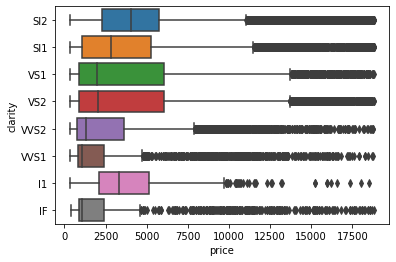

In [384]:
sns.boxplot(data=data , x='price' , y='clarity')

<AxesSubplot:xlabel='price', ylabel='cut'>

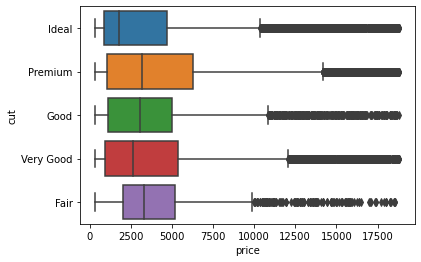

In [385]:
sns.boxplot(data=data , x='price' , y='cut')

<AxesSubplot:xlabel='price', ylabel='color'>

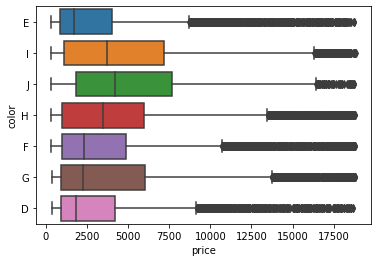

In [386]:
sns.boxplot(data=data , x='price' , y='color')

# Prepare the data

# A- Data Cleaning

In [387]:
#Observed that the minimum value of x (length), y(width) & z(depth) is zero and It doesn't make any sense to have length\width\depth of a diamond to be zero.
test= data[['x','y','z']].replace(0,np.NaN)
test.isnull().sum()
#There are total of 20 rows having x or y or z to be zero and now we will drop those rows

x     8
y     7
z    20
dtype: int64

In [388]:
data['x']=data['x'].fillna(data['x'].mean())
data['y']=data['y'].fillna(data['y'].mean())
data['z']=data['z'].fillna(data['z'].mean())

In [389]:
data.isna().sum()
#there is  no missing value 

carat      0
cut        0
color      0
clarity    0
table      0
price      0
x          0
y          0
z          0
volume     0
dtype: int64

# B- Attribute Combinations

In [390]:
data['volume']=data['x']*data['y']*data['z']

In [391]:
data

,carat,cut,color,clarity,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,58.0,2757,6.15,6.12,3.74,140.766120


In [392]:
data.drop(["x", "y", "z"],inplace=True,axis=1)

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   table    53940 non-null  float64
 5   price    53940 non-null  int64  
 6   volume   53940 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


# C- Handling Text and Categorical Attributes

In [394]:
print(data["cut"].unique())
print(data["color"].unique())
print(data["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [395]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()
data['cut']=labelencoder.fit_transform(data['cut'])
cut_ord ={index: label for index,label in enumerate(labelencoder.classes_)}
cut_ord


{0: 'Fair', 1: 'Good', 2: 'Ideal', 3: 'Premium', 4: 'Very Good'}

In [396]:
data['color']=labelencoder.fit_transform(data['color'])
clarity_ord ={index: label for index,label in enumerate(labelencoder.classes_)}
clarity_ord

{0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}

In [397]:
data['clarity']=labelencoder.fit_transform(data['clarity'])
clarity_ord ={index: label for index,label in enumerate(labelencoder.classes_)}
clarity_ord

{0: 'I1',
 1: 'IF',
 2: 'SI1',
 3: 'SI2',
 4: 'VS1',
 5: 'VS2',
 6: 'VVS1',
 7: 'VVS2'}

In [398]:
#delet the outliers in dataset
#find Q1, Q3, and interquartile range for each column
import scipy.stats as stats
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 2*IQR of Q1 and Q3
data = data[~((data < (Q1-2*IQR)) | (data > (Q3+2*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data.shape

(51571, 7)

In [399]:
data

,carat,cut,color,clarity,table,price,volume
0,0.23,2,1,3,55.0,326,38.202030
1,0.21,3,1,2,61.0,326,34.505856
2,0.23,1,1,4,65.0,327,38.076885
3,0.29,3,5,5,58.0,334,46.724580
4,0.31,1,6,3,58.0,335,51.917250
...,...,...,...,...,...,...,...
53935,0.72,2,0,2,57.0,2757,115.920000
53936,0.72,1,0,2,55.0,2757,118.110175
53937,0.70,4,0,2,60.0,2757,114.449728
53938,0.86,3,4,3,58.0,2757,140.766120


In [400]:
y=data['price']
X=data.drop('price' ,axis=1)

In [401]:
X

,carat,cut,color,clarity,table,volume
0,0.23,2,1,3,55.0,38.202030
1,0.21,3,1,2,61.0,34.505856
2,0.23,1,1,4,65.0,38.076885
3,0.29,3,5,5,58.0,46.724580
4,0.31,1,6,3,58.0,51.917250
...,...,...,...,...,...,...
53935,0.72,2,0,2,57.0,115.920000
53936,0.72,1,0,2,55.0,118.110175
53937,0.70,4,0,2,60.0,114.449728
53938,0.86,3,4,3,58.0,140.766120


In [402]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 51571, dtype: int64

# D- Feature Scaling

In [403]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(X,y)

array([[-1.26240385, -0.54676909, -0.92205007, -0.48959625, -1.11468084,
        -1.26183088],
       [-1.31112247,  0.43407927, -0.92205007, -1.06683428,  1.67101745,
        -1.31764669],
       [-1.26240385, -1.52761746, -0.92205007,  0.08764177,  3.52814965,
        -1.26372069],
       ...,
       [-0.11751617,  1.41492764, -1.51210124, -1.06683428,  1.2067344 ,
        -0.11041676],
       [ 0.27223283,  0.43407927,  0.84810346, -0.48959625,  0.27816831,
         0.28698626],
       [ 0.00428039, -0.54676909, -1.51210124, -0.48959625, -1.11468084,
         0.04238566]])

#  Create a Test Set and Train Set¶

In [404]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Select and Train a Model

In [405]:
from sklearn.linear_model import LinearRegression
                  #model
linear_regression=LinearRegression()
            
linear_regression.fit(X_train,y_train)

LinearRegression()

In [406]:
y_pred =linear_regression.predict(X_test)
print(y_pred)

[ 284.53989285  901.26708311 2698.10624335 ... 1246.82211038  667.01232507
 2803.61731439]


In [407]:
from sklearn.metrics import r2_score
print("Accuracy=",r2_score(y_test,y_pred))

Accuracy= 0.8841181299215469


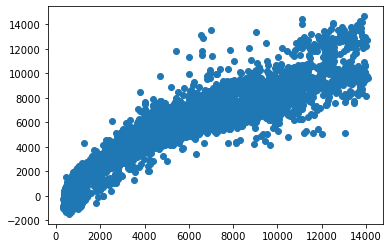

In [408]:
# Plot a scatter plot  to see prediction perfection 
plt.scatter(y_test,y_pred)

C:\Users\nabee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


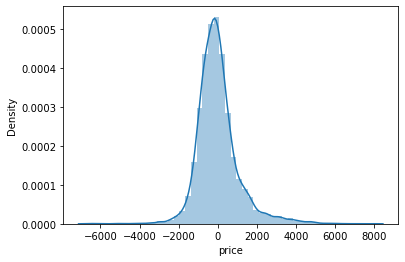

In [409]:
import seaborn as sns
sns.distplot((y_test-y_pred),bins=50);

# measure this regression model’s RMSE on the whole training set¶

In [410]:
from sklearn.metrics import mean_squared_error
y_pred =linear_regression.predict(X_test)
linear_MSE=mean_squared_error(y_test,y_pred)
linear_RMSE=np.sqrt(linear_MSE)
print(linear_RMSE)

1066.0954748127365


# judge on the RMSE result for this model

 not a great score...we could try to add more features to make good prediction or the model is not powerful enough,so we will try more model to see how it dose.

# Let’s train a Decision Tree Regressor model

In [411]:
from sklearn.tree import DecisionTreeRegressor
tree_regression = DecisionTreeRegressor()
tree_regression.fit(X_train,y_train)

DecisionTreeRegressor()

In [412]:
y_pred =tree_regression.predict(X_test)
y_pred

array([ 544.,  828., 2274., ..., 1046., 1054., 2357.])

In [413]:
from sklearn.metrics import r2_score
print("Accuracy=",r2_score(y_test,y_pred))

Accuracy= 0.9664362854323283


In [414]:
print(tree_regression.score(X_test,y_test))

0.9664362854323283


# Now evaluate the model on the training set

In [415]:
y_pred =tree_regression.predict(X_test)
tree_MSE=mean_squared_error(y_test,y_pred)
tree_RMSE=np.sqrt(tree_MSE)
tree_RMSE

573.750876383193

# Let’s train the Ridge model

In [416]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
Ridge()

Ridge()

In [417]:
y_pred =ridge.predict(X_test)
y_pred

array([ 284.53392044,  901.5167563 , 2698.66808498, ..., 1246.92328289,
        666.9725363 , 2804.24118066])

In [418]:
from sklearn.metrics import r2_score
print("Accuracy=",r2_score(y_test,y_pred))

Accuracy= 0.884126634145184


In [419]:
print(ridge.score(X_test,y_test))

0.884126634145184


In [420]:
dim_predicitions =ridge.predict(X_test)
ridge_MSE=mean_squared_error(y_test,dim_predicitions)
ridge_RMSE=np.sqrt(ridge_MSE)
ridge_RMSE

1066.0563553168497

# Let’s train the Lasso model

In [421]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
Lasso()

Lasso()

In [422]:
y_pred =lasso.predict(X_test)
y_pred

array([ 284.40588089,  906.27804128, 2714.4998174 , ..., 1247.55360143,
        666.31194835, 2816.69742757])

In [423]:
from sklearn.metrics import r2_score
print("Accuracy=",r2_score(y_test,y_pred))

Accuracy= 0.8842569814183121


In [424]:
print(lasso.score(X_test,y_test))

0.8842569814183121


# Let’s train the RandomForestRegressor model.

In [425]:
from sklearn.ensemble import RandomForestRegressor
forest_regression = RandomForestRegressor()
forest_regression.fit(X_train,y_train)

RandomForestRegressor()

In [426]:
y_pred =forest_regression.predict(X_test)
y_pred

array([ 573.55166667,  886.60833333, 2548.77      , ..., 1005.385     ,
       1054.09      , 1948.46      ])

In [427]:
from sklearn.metrics import r2_score
print("Accuracy=",r2_score(y_test,y_pred))

Accuracy= 0.9821840135150548


In [428]:
y_pred =forest_regression.predict(X_test)
forest_MSE=mean_squared_error(y_test,y_pred)
forest_RMSE=np.sqrt(forest_MSE)
forest_RMSE

418.0163700661709

C:\Users\nabee\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


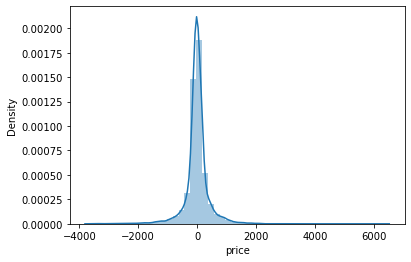

In [430]:
sns.distplot((y_test-y_pred),bins=50);

In [431]:
y_pred =forest_regression.predict(X_test)
forest_MSE=mean_squared_error(y_test,y_pred)
forest_RMSE=np.sqrt(forest_MSE)
forest_RMSE

418.0163700661709

# fune tune your model
# Grid search

In [432]:
#need to fine tune the data to imporove the accuracy
from sklearn.model_selection import GridSearchCV

In [433]:
param_grid=[{'n_estimators':[250,300,350],'max_features':[2,4,6,8]},
            {'bootstrap':[True],'n_estimators':[10,20],'max_features':[4,6,8]}]
forest_regression = RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_regression,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train,y_train)

C:\Users\nabee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nabee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nabee\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\nabee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nabee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nabee\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\nabee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nabee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nabee\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\nabee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nabee\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nabee\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\nabee\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [250, 300, 350]},
                         {'bootstrap': [True], 'max_features': [4, 6, 8],
                          'n_estimators': [10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [434]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 300}

In [435]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=300, random_state=42)

In [436]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

447.07286692321793 {'max_features': 2, 'n_estimators': 250}
446.3469837270392 {'max_features': 2, 'n_estimators': 300}
446.3161189071466 {'max_features': 2, 'n_estimators': 350}
429.0832508502118 {'max_features': 4, 'n_estimators': 250}
428.89247804134095 {'max_features': 4, 'n_estimators': 300}
428.90084023723074 {'max_features': 4, 'n_estimators': 350}
434.1083058478559 {'max_features': 6, 'n_estimators': 250}
433.98725934804776 {'max_features': 6, 'n_estimators': 300}
433.8963581246823 {'max_features': 6, 'n_estimators': 350}
nan {'max_features': 8, 'n_estimators': 250}
nan {'max_features': 8, 'n_estimators': 300}
nan {'max_features': 8, 'n_estimators': 350}
450.9186877623105 {'bootstrap': True, 'max_features': 4, 'n_estimators': 10}
439.0946755293709 {'bootstrap': True, 'max_features': 4, 'n_estimators': 20}
454.96557539241684 {'bootstrap': True, 'max_features': 6, 'n_estimators': 10}
444.04673645677383 {'bootstrap': True, 'max_features': 6, 'n_estimators': 20}
nan {'bootstrap': Tr

In [437]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.55862482, 0.00383172, 0.03089235, 0.0752806 , 0.00464797,
       0.32672255])

In [438]:
final_model=grid_search.best_estimator_
final_pred=final_model.predict(X_test)
final_mse=mean_squared_error(y_test,final_pred)
final_rmse=np.sqrt(final_mse)
final_rmse

412.5760504351784

In [439]:
from sklearn.metrics import r2_score
print("Accuracy=",r2_score(y_test,y_pred))

Accuracy= 0.9821840135150548
